# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

#### Clean, elegant, and reusable plotting functions

In [5]:
from matplotlib.lines import Line2D

def style_axes(ax, title='', xlabel='', ylabel='', vertical_grid=True, title_pad=40):
    # Fondo transparente
    ax.set_facecolor('none')
    ax.figure.patch.set_alpha(0.0)

    # Rejilla rosa vertical
    ax.grid(True, which='major', axis='x' if vertical_grid else 'both', color='pink', alpha=0.8)

    # Ejes en negro
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')

    # Título y etiquetas
    ax.set_title(title, pad=50)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


def custom_legend(ax):
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)
    ]
    ax.legend(
        handles=legend_handles,
        labels=['Failed', 'Success'],
        title='Outcome',
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        ncol=2,
        frameon=False
    )


def cat_colors(ax, data, hue_col='Class'):
    class_colors = {0: 'red', 1: 'green'}
    for t, l in zip(ax.collections, data[hue_col]):
        t.set_facecolor(class_colors[l])



## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [7]:
URL = "data/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [8]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


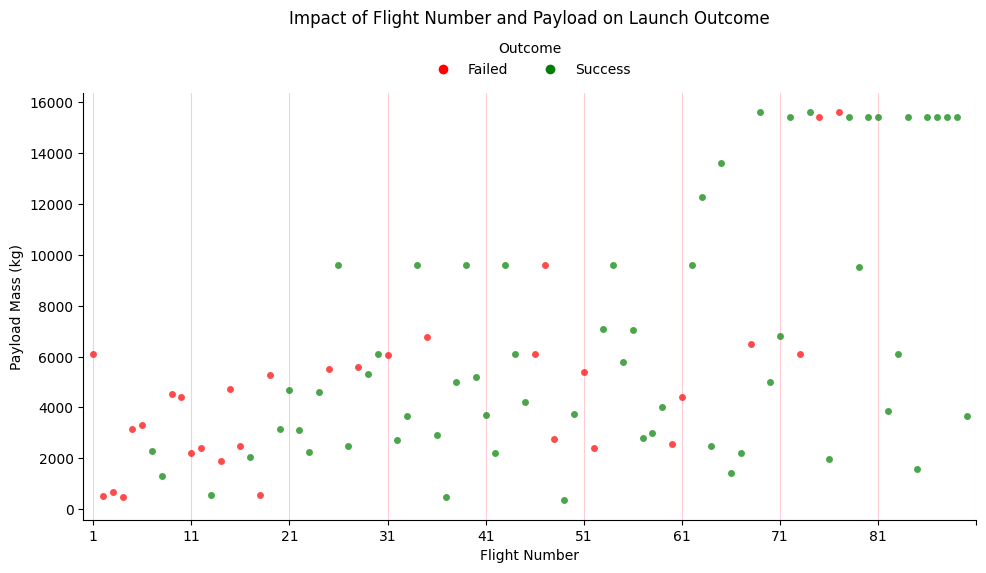

In [9]:
# Crear el gráfico
g = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, kind='strip', palette={0: 'red', 1: 'green'}, legend=False, aspect=2, alpha=0.7 )

# Tomar el eje del catplot
ax = g.ax

# Ajustar los ticks y límites del eje X
ticks = list(range(0, df['FlightNumber'].max() + 1, 10))
ax.set_xticks(ticks)
ax.set_xlim(-1, df['FlightNumber'].max())

# Aplicar estilos y leyenda
style_axes(ax, 'Impact of Flight Number and Payload on Launch Outcome', 'Flight Number', 'Payload Mass (kg)')
custom_legend(ax)

plt.show()


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


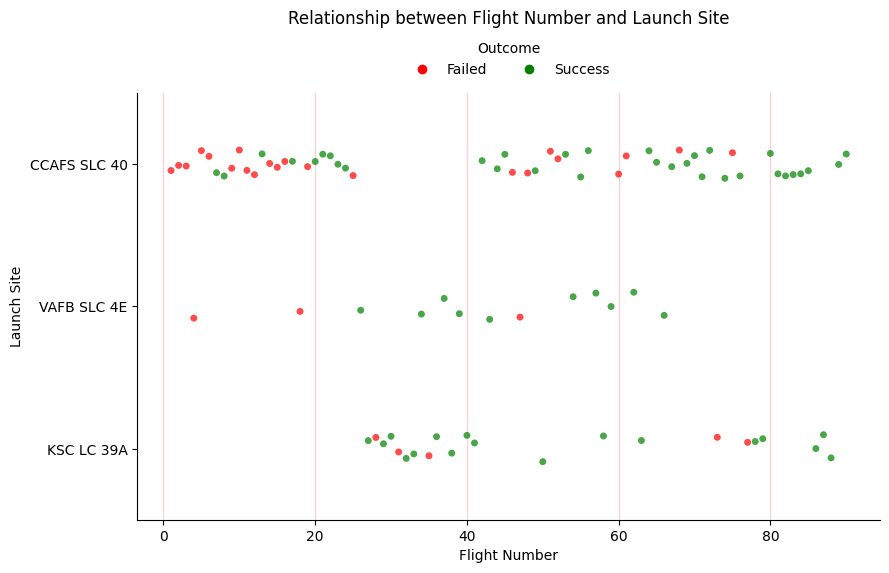

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
g = sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='strip', height=5, aspect=1.8, alpha=0.7, palette={0: 'red', 1: 'green'}, legend=False)
ax = g.ax
style_axes(ax, 'Relationship between Flight Number and Launch Site', 'Flight Number', 'Launch Site')
custom_legend(ax)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


- CCAFS SLC-40 es el sitio más usado; otros tienen menos vuelos.
- Los primeros vuelos muestran más fallos, mientras que los vuelos posteriores son mayormente exitosos.
- La proporción de éxitos aumenta con el número de vuelo, reflejando mejora con la experiencia.
- El gráfico evidencia la curva de aprendizaje y confiabilidad por sitio.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


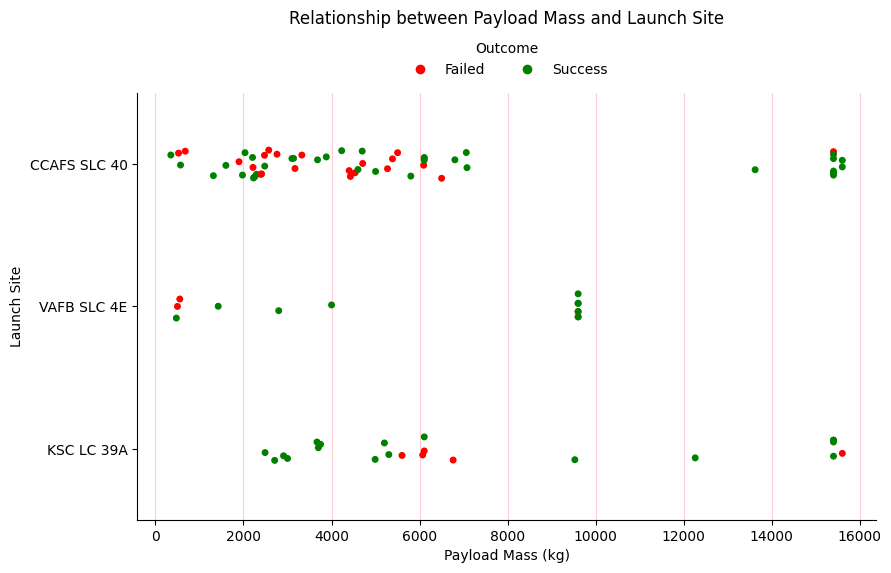

In [11]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
g = sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, kind='strip', height=5, aspect=1.8, palette={0: 'red', 1: 'green'}, legend=False)
ax = g.ax
style_axes(ax,'Relationship between Payload Mass and Launch Site', 'Payload Mass (kg)', 'Launch Site')
custom_legend(ax)
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


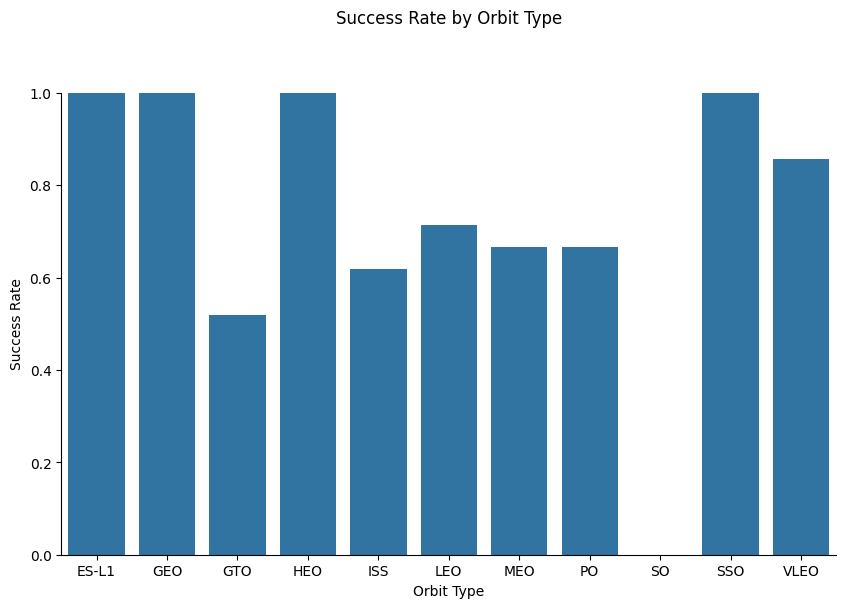

In [13]:
plt.figure(figsize=(10,6))
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()
ax = sns.barplot(x='Orbit', y='Class', data=orbit_success)
style_axes(ax, title='Success Rate by Orbit Type', xlabel='Orbit Type', ylabel='Success Rate')
ax.grid(False)
ax.set_ylim(0, 1)
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


- Las órbitas “LEO” (Low Earth Orbit) y “ISS” generalmente muestran las tasas de éxito más altas, cercanas al 100%.
- Órbitas como GTO o PO tienden a tener una tasa de éxito ligeramente menor, aunque todavía bastante alta.
- Esto indica que SpaceX ha alcanzado mayor confiabilidad en órbitas más comunes y menos complejas (LEO e ISS), mientras que órbitas más exigentes o de transferencia geosincrónica presentan un poco más de riesgo.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


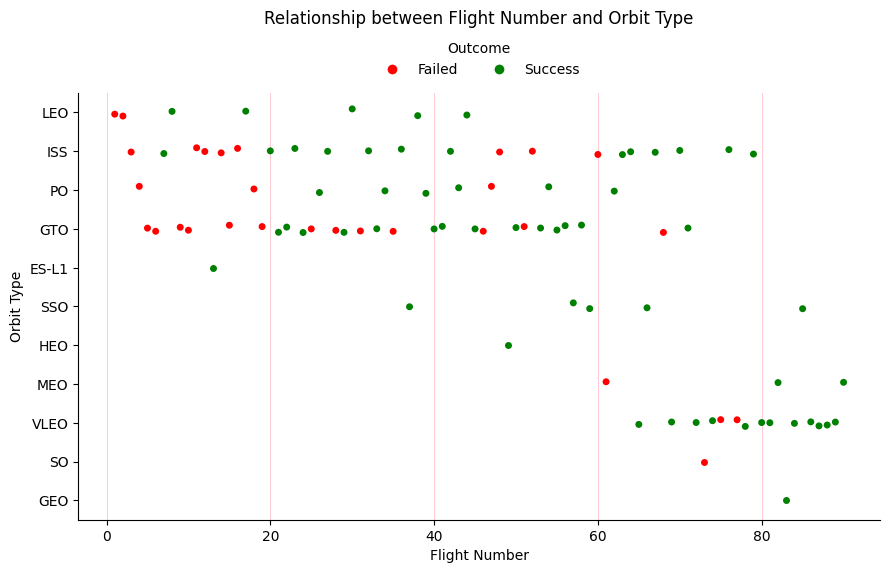

In [15]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
g = sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df, kind='strip', height=5, aspect=1.8, palette={0: 'red', 1: 'green'}, legend=False)
ax = g.ax
style_axes(ax,'Relationship between Flight Number and Orbit Type', 'Flight Number', 'Orbit Type')
custom_legend(ax)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


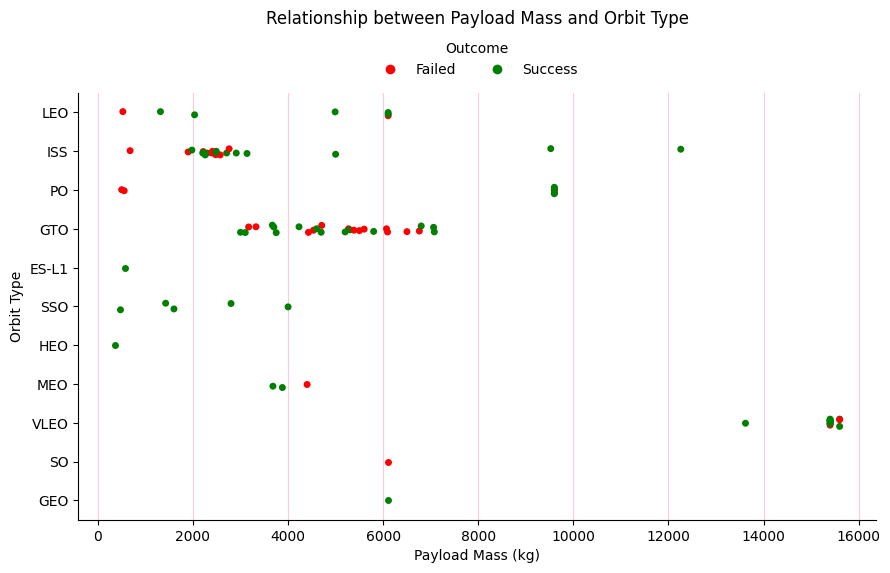

In [16]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
g = sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df, kind='strip', height=5, aspect=1.8, palette={0: 'red', 1: 'green'}, legend=False)
ax = g.ax
style_axes(ax,'Relationship between Payload Mass and Orbit Type', 'Payload Mass (kg)', 'Orbit Type')
custom_legend(ax)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [17]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


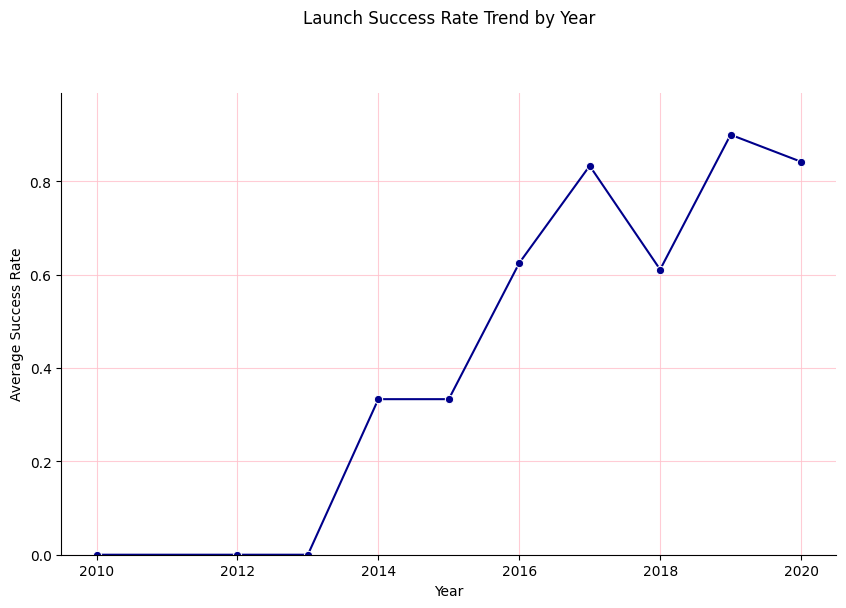

In [18]:
# Preparar datos
df['Year'] = df['Date'].apply(lambda x: int(x.split("-")[0]))
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o', color='darkblue')
style_axes(ax, title='Launch Success Rate Trend by Year', xlabel='Year', ylabel='Average Success Rate', vertical_grid=False)
ax.set_ylim(0, 0.99)  # para que la línea no toque el borde superior
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [19]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']].copy()
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [20]:
# Limpiar posibles espacios en blanco en las columnas categóricas
for col in ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']:
    features[col] = features[col].str.strip()

# Aplicar One-Hot Encoding a las columnas categóricas
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Mostrar los primeros registros
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [25]:
features_one_hot = features_one_hot.astype('float64')

# Verificar los tipos de datos
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


Export it to a <b>CSV</b> for the next section

In [96]:
# features_one_hot.to_csv('data/dataset_part_3.csv', index=False)